
# Import Libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import histogram
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
from langdetect import detect
from sklearn.preprocessing import StandardScaler,OneHotEncoder,normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

# Read File and Load Data

In [201]:

 
df = pd.read_csv("F:/Local Disk (D)/AI-python-EPSLION/Final Project-Reem Nabil-20231226/DataSet/heart_attack_prediction_dataset.csv")
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,NaN,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8754 non-null   float64
 12  Diet                

In [203]:
"""

describe command for categorical values only.

From here its considered that Males most susceptible to heart attack than females.


"""
df.describe(include = 'all')

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763,8763,8756,8763.000000
unique,8763,NaN,2,NaN,3915,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,6,2,NaN
top,BMW7812,NaN,Male,NaN,146/94,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Asia,Northern Hemisphere,NaN
freq,1,NaN,6111,NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,477,2543,5656,NaN
mean,NaN,53.707977,NaN,259.877211,NaN,75.021682,0.652288,0.492982,0.896839,0.501426,...,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,NaN,NaN,NaN,0.358211
std,NaN,21.249509,NaN,80.863276,NaN,20.550948,0.476271,0.499979,0.304186,0.500026,...,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,NaN,NaN,NaN,0.479502
min,NaN,18.000000,NaN,120.000000,NaN,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,NaN,NaN,NaN,0.000000
25%,NaN,35.000000,NaN,192.000000,NaN,57.000000,0.000000,0.000000,1.000000,0.000000,...,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,NaN,NaN,NaN,0.000000
50%,NaN,54.000000,NaN,259.000000,NaN,75.000000,1.000000,0.000000,1.000000,1.000000,...,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,NaN,NaN,NaN,0.000000
75%,NaN,72.000000,NaN,330.000000,NaN,93.000000,1.000000,1.000000,1.000000,1.000000,...,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,NaN,NaN,NaN,1.000000


In [204]:
#check dublication 
df.duplicated().sum()

0

# Missing Values

In [205]:
'''
missing data here in Exercise Hours Per Week & Hemisphere
'''
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            9
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         7
Heart Attack Risk                  0
dtype: int64

In [206]:
df['Hemisphere'].isnull().sum()

7

In [207]:
'''
here to deal with missing values :
fill missng data.
For Categorical Data ==> Fill with Mode (Most frequent).
for numerical data ==> fill with mean or median depend on is there any outliers or not.

in dataset the patients resides more in "Northern Hemisphere".

'''
df['Hemisphere'].mode()

0    Northern Hemisphere
Name: Hemisphere, dtype: object

# Fillna missing categorical data with Mode

In [208]:

df['Hemisphere'].fillna(df['Hemisphere'].mode()[0], inplace=True)

In [209]:
'''
after fill with mode ; there is no missing data.
'''
df['Hemisphere'].isnull().sum()

0

# Check outliers of missing numeriacl data by box plot

In [210]:

  
fig = px.box(df, y='Exercise Hours Per Week')


fig.show()

# Fillna Missing numerical data with Median

In [211]:
'''
1) from above boxplot ==> there is no outliers affetcted the data of  "Exercise Hours Per Week".
2) fillna with median.

'''
df['Exercise Hours Per Week'].median()

10.070897344999999

In [212]:
'''
i can make fillna to Rating with mean or meadian as outliers is not affect.

here i make fillna to Rating with median .
'''
df['Exercise Hours Per Week'].fillna(df['Exercise Hours Per Week'].median(), inplace=True)

In [213]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

# Exploratory Data Analysis (EDA)

In [214]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

# Univariates

<Axes: xlabel='Sex', ylabel='Percent'>

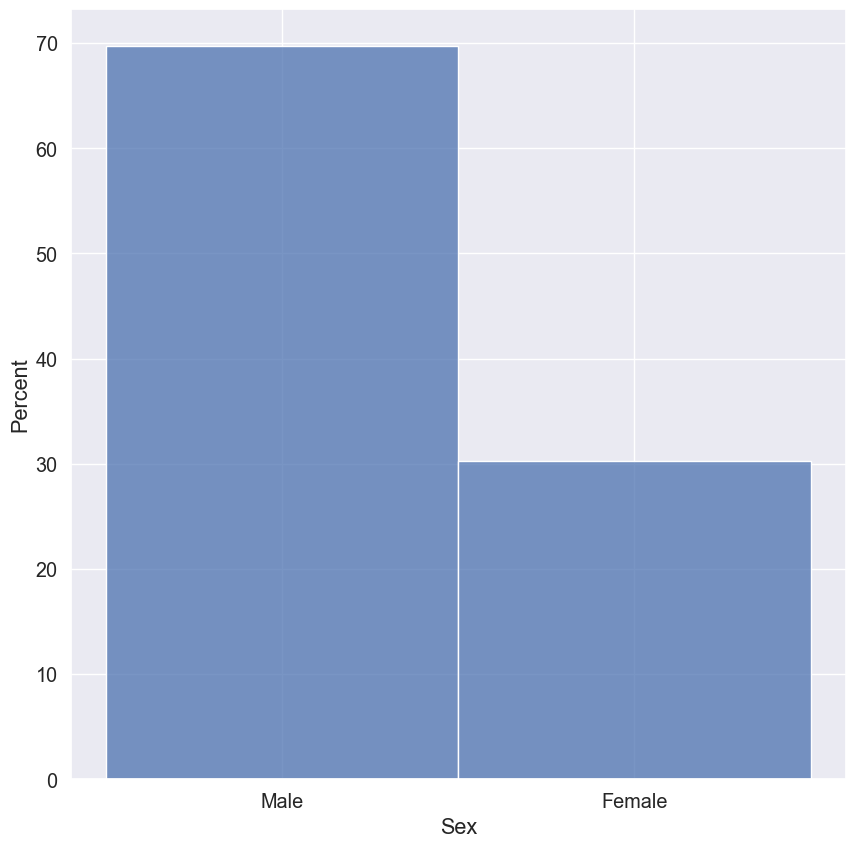

In [215]:
sns.histplot(df, x="Sex",stat='percent')

([<matplotlib.patches.Wedge at 0x27d50290310>,
 [Text(-0.9602245610266066, 0.5366272378488263, 'Healthy'),
  Text(0.027207959994841456, -1.0996634607519336, 'Average'),
  Text(0.9466575216017192, 0.5602138313134464, 'Unhealthy')],
 [Text(-0.5237588514690581, 0.2927057660993598, '33.778'),
  Text(0.0148407054517317, -0.5998164331374183, '33.231'),
  Text(0.5163586481463923, 0.30557118071642525, '32.991')])

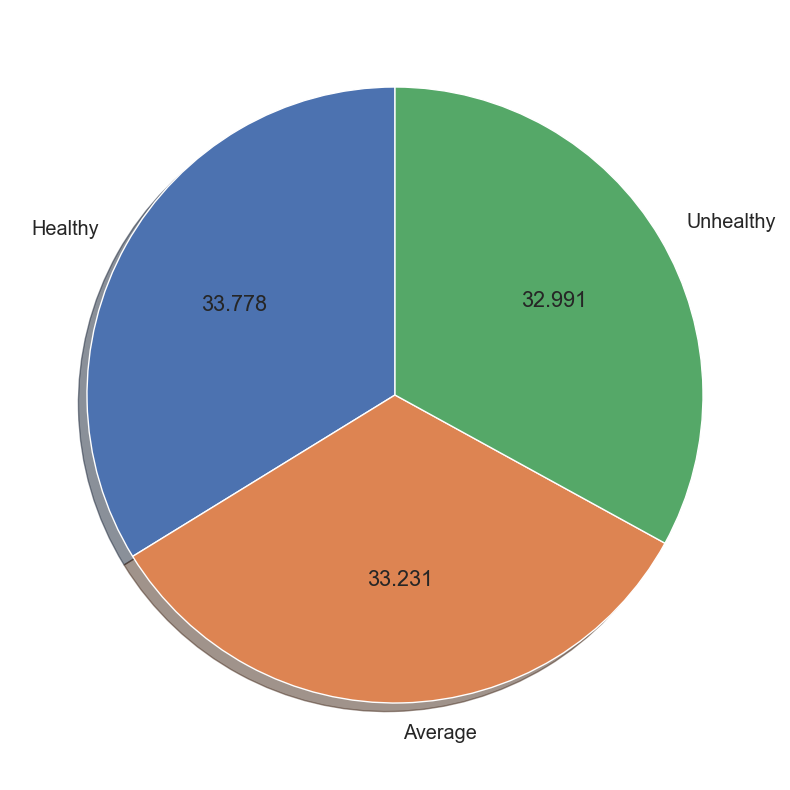

In [216]:
plt.pie(df['Diet'].value_counts(),startangle=90,autopct='%.3f',
labels = ['Healthy','Average','Unhealthy'],shadow = 'True')


In [217]:
fig = px.histogram(df,x='Continent',histnorm='percent')
fig.show()

<Axes: xlabel='Hemisphere', ylabel='Percent'>

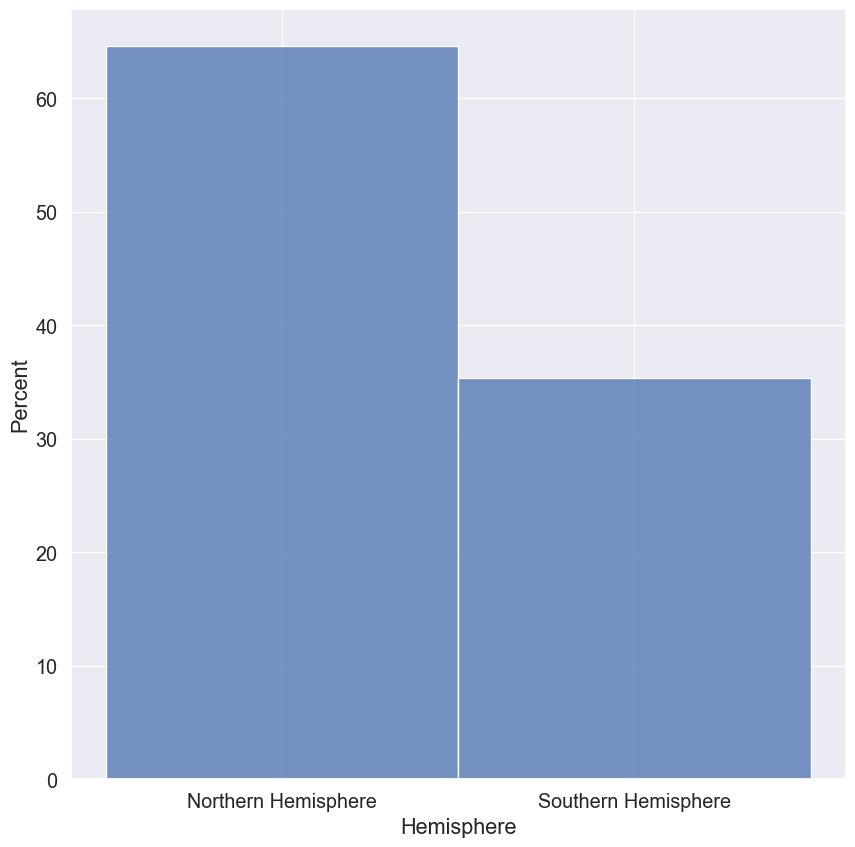

In [218]:
sns.histplot(df, x="Hemisphere",stat='percent')

In [219]:
fig = px.histogram(df,x='Country',histnorm='percent')
fig.show()

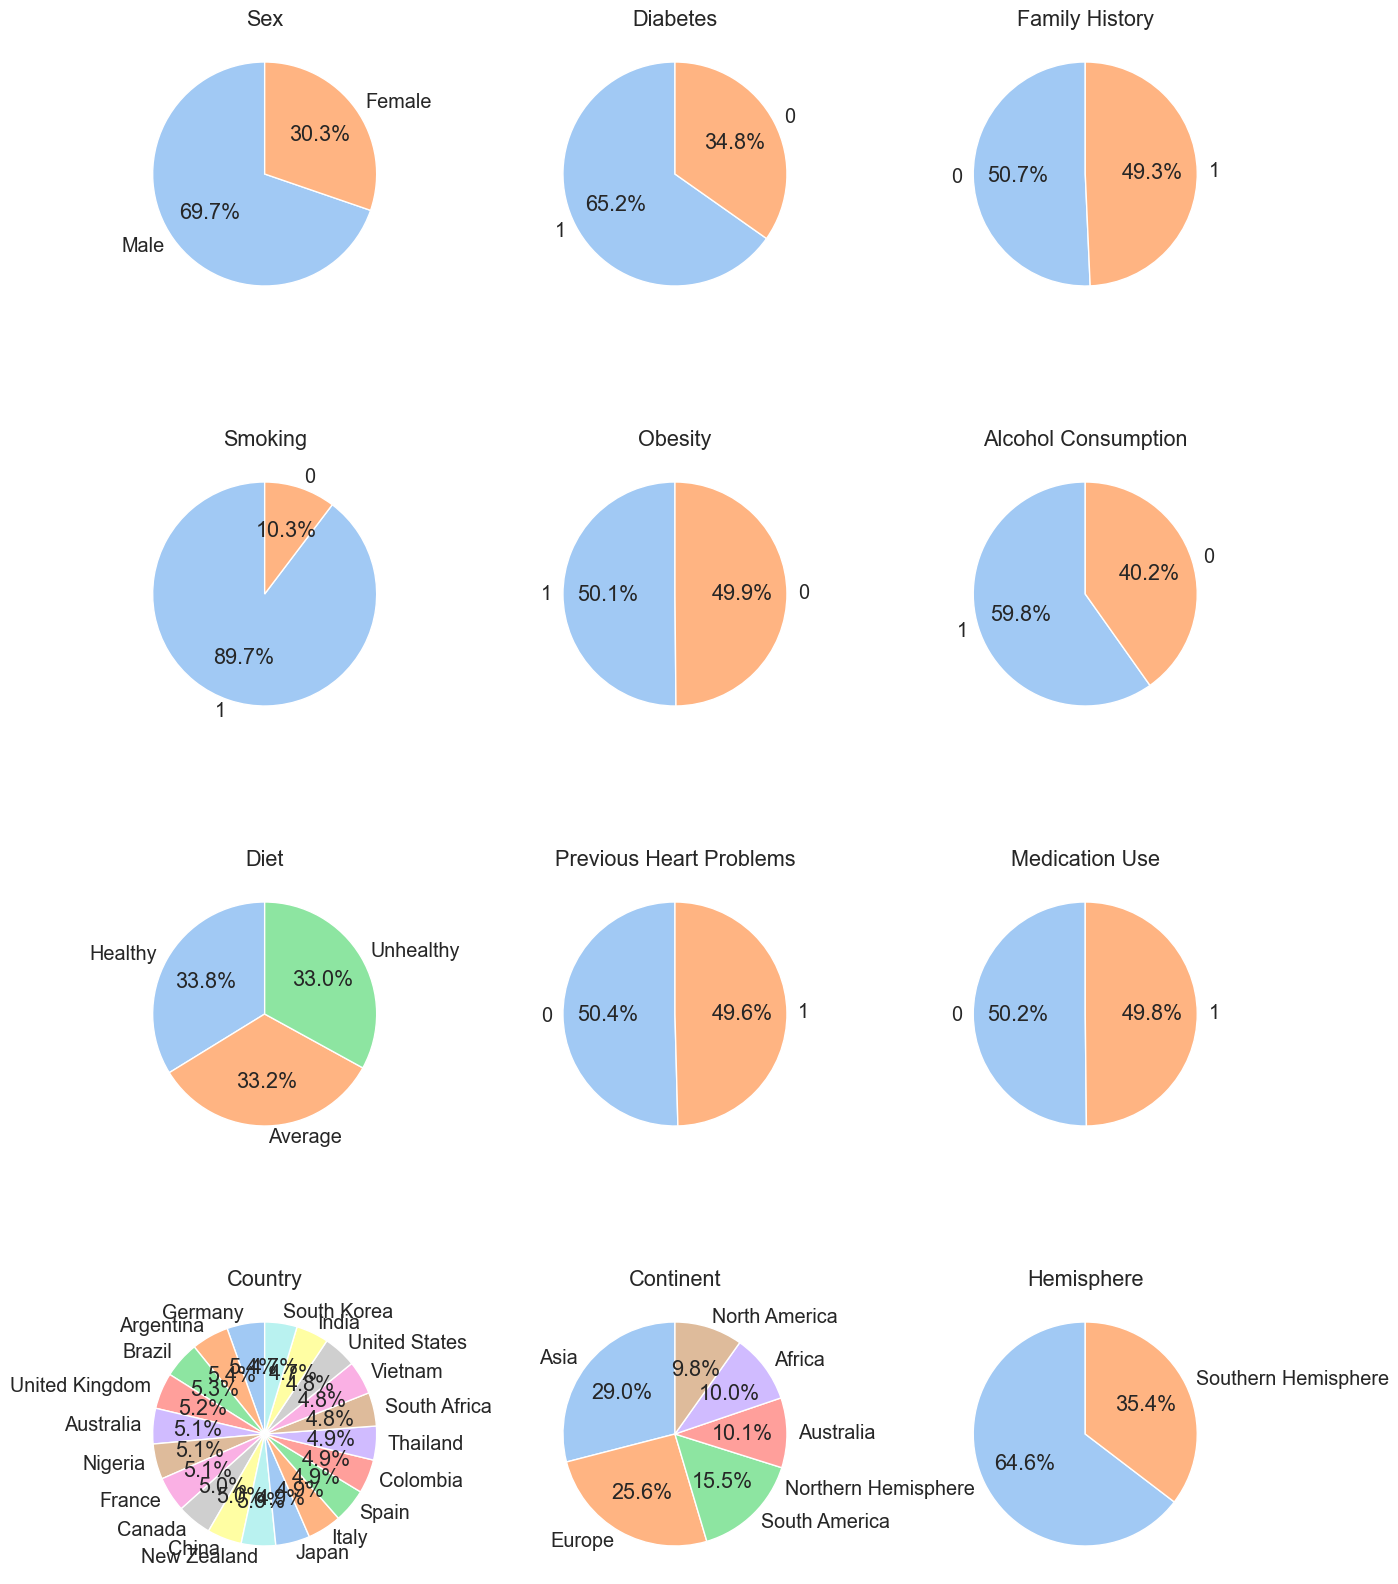

In [220]:
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere']
# Set up the number of rows and columns for subplots
num_rows = len(categorical_columns) // 3
num_cols = min(3, len(categorical_columns))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    
    counts = df[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(column)
plt.show()

# Feature Engineer and Bivariate

In [221]:
'''
Splitting "Blood Pressure" into  Diastolic and Systolic 
'''
df['Systolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])  # high 
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1]) # low


In [222]:
df_COU_BMI = df.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")
df_COU_BMI

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


In [223]:

fig = px.bar(df_COU_BMI, y="BMI", title="Country-BMI Relation")
fig.show()

In [224]:
px.density_heatmap(df,x='Diet', y='Age')

<Axes: xlabel='Sex', ylabel='count'>

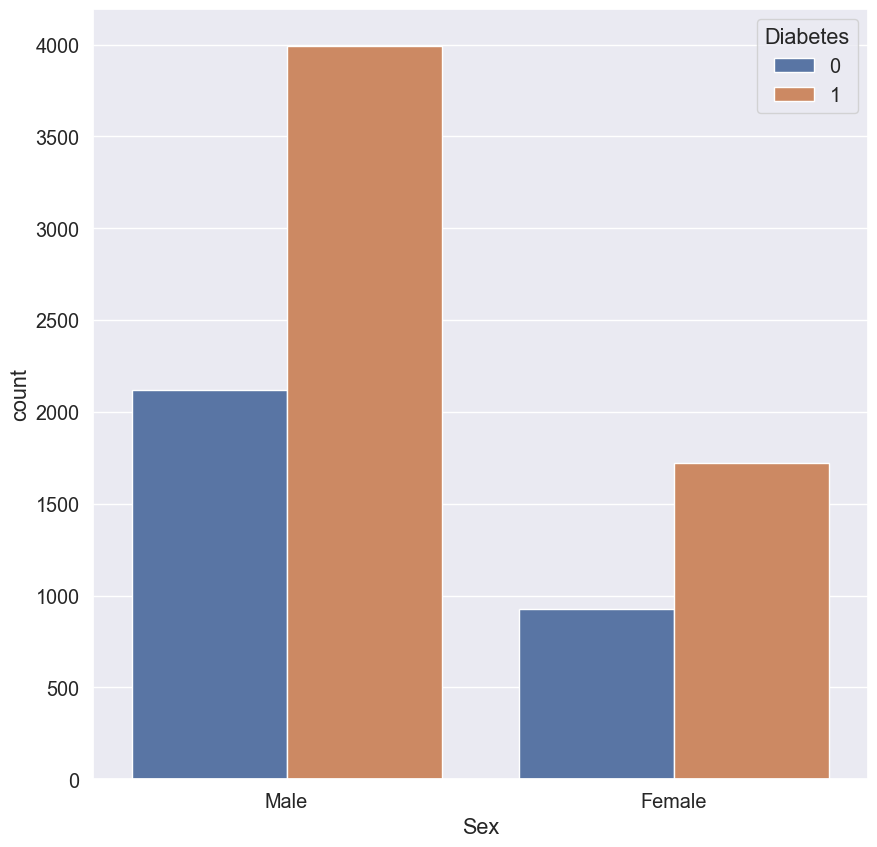

In [225]:
sns.countplot(x ='Sex', hue = "Diabetes", data = df)

<Axes: xlabel='Sex', ylabel='count'>

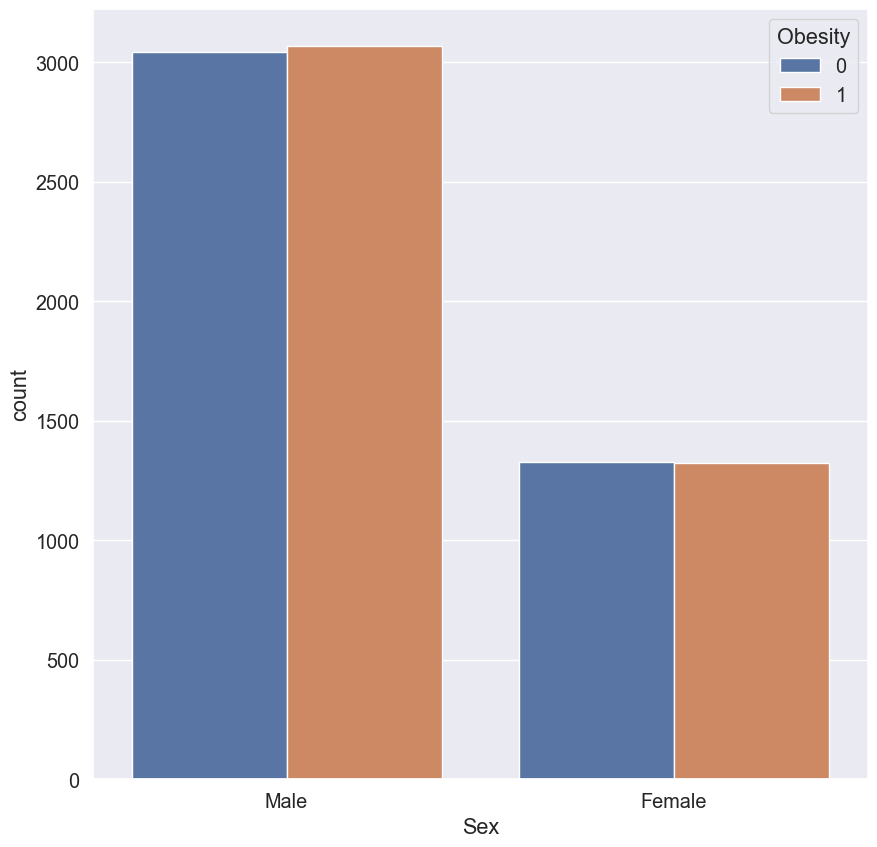

In [226]:
sns.countplot(x ='Sex', hue = "Obesity", data = df)



In [227]:
df.groupby('Continent')[['Heart Attack Risk']].mean().sort_values(by = "Heart Attack Risk")

,Heart Attack Risk
Continent,
Europe,0.345828
Asia,0.353913
Australia,0.360860
South America,0.366373
Africa,0.368843
North America,0.376744


<Axes: xlabel='Heart Attack Risk', ylabel='Continent'>

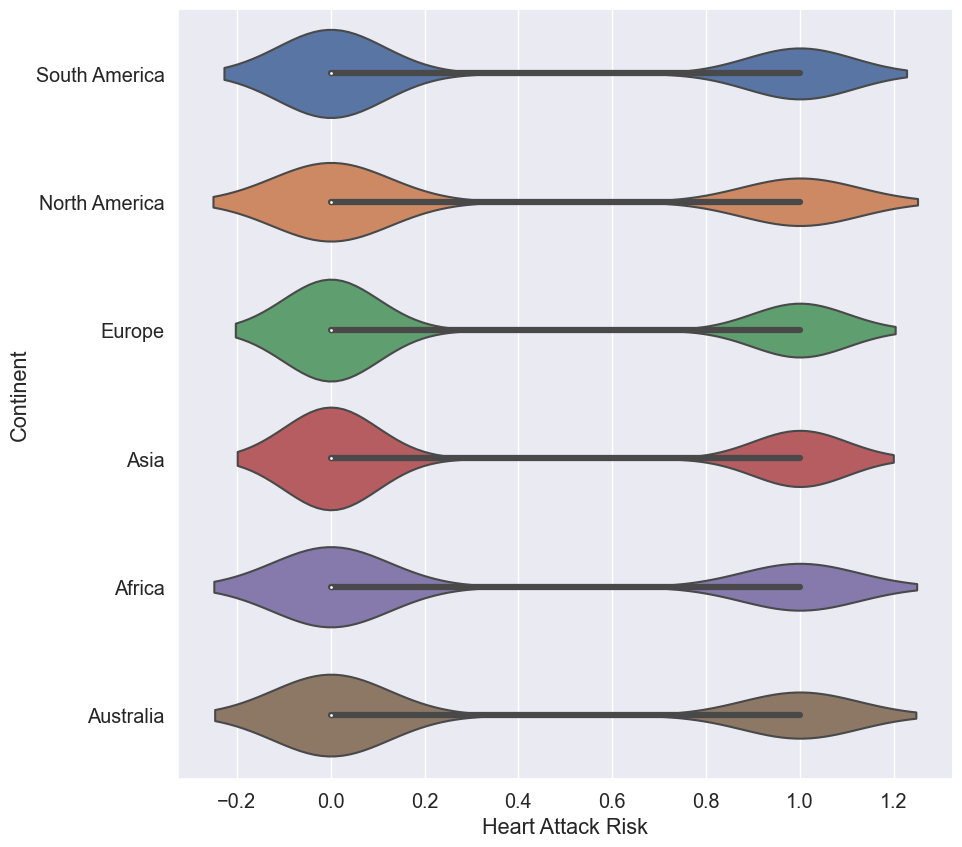

In [228]:
sns.violinplot(x = 'Heart Attack Risk', y = 'Continent', data = df)

In [229]:
df_COU_HEART = df.groupby('Country')[['Heart Attack Risk']].mean().sort_values(by = "Heart Attack Risk")
df_COU_HEART

,Heart Attack Risk
Country,
India,0.313107
Italy,0.315545
Japan,0.332564
South Africa,0.338824
New Zealand,0.347126
Vietnam,0.348235
Spain,0.348837
United Kingdom,0.350109
France,0.352018


In [230]:
fig = px.bar(df_COU_HEART, y="Heart Attack Risk", title="Country-Heart Attack Risk Relation")
fig.show()

In [231]:
px.density_heatmap(df,x="Stress Level", y="Income" ,title="Stress Level-Income Relation")


In [232]:
'''
==> In Univariate i use 6 visualization using "histplot" , "Pie chart" , "histogram".
 

==> In Bivariate i use 8 visualization using heatmap , violinplot ,sns.countplot , violinplot , px.bar.

univariate:
***********
From univariate diagrams the results as per below:
- 70 % from patients that mentioned in dataset were Males while 30 % from patients were females.
- The more percentage regarding "DIET" feature that mentioned in dataset considering "33.778" as healthy then "33.231" as average while "32.991".
- "Asia Continent" is existed with percentage 29% then "Europe" with percentage 25.57% and the less percenatge was for "Africa" then "North America".
- "Northen Hemisphere" is existed with percentage more than 60%.
- The more percenatge countries mentioned more in dataset was for "germany and Nigeria" while the less countries was belong to "south koria".
- The diabetes patients with percentage 65.2%
- 50.7% of patients have family history.
- 89.7% of patients are smoker and also 50.1 of them suffering "obesity".
- 59.8 % of patients consume alkhol.

Bivariate:
***********
From Bivariate diagrams the results as per below:
- The most of mean of BMI belong to "South Korea" , "United States" , "Germany"  while the less BMI mean belongs to "Japan" , "France" , "Vietnam".
- Age between "20" and "24" are unhealthy but more than 25 years till 29 years are healthy ;  and the ages between 80 and 84 unhealthy persons.
- Males with diabetes is more than females with diabets.
- Males with obesity more than males who are not obesity.
- "North America Continent" and "Africa " are the most suffering from "heart attack risk"  while for "Europe" and "Asia" are less suffer from "heart attack risk".
- The most average values of the countries who suffering from "heart attack risk" belong to "South Korea"  and "Nigeria"  while the less countries are "India" and "Italy".

'''

'\n==> In Univariate i use 6 visualization using "histplot" , "Pie chart" , "histogram".\n \n\n==> In Bivariate i use 8 visualization using heatmap , violinplot ,sns.countplot , violinplot , px.bar.\n\nunivariate:\n***********\nFrom univariate diagrams the results as per below:\n- 70 % from patients that mentioned in dataset were Males while 30 % from patients were females.\n- The more percentage regarding "DIET" feature that mentioned in dataset considering "33.778" as healthy then "33.231" as average while "32.991".\n- "Asia Continent" is existed with percentage 29% then "Europe" with percentage 25.57% and the less percenatge was for "Africa" then "North America".\n- "Northen Hemisphere" is existed with percentage more than 60%.\n- The more percenatge countries mentioned more in dataset was for "germany and Nigeria" while the less countries was belong to "south koria".\n- The diabetes patients with percentage 65.2%\n- 50.7% of patients have family history.\n- 89.7% of patients are sm

# Machine Learning

In [233]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [234]:
'''
here i will drop Patient ID , Country , Continent ,Hemisphere , Blood Pressure.
'''
df.drop('Patient ID',axis=1,inplace = True)
df.drop('Country',axis=1,inplace = True)
df.drop('Continent',axis=1,inplace = True)
df.drop('Hemisphere',axis=1,inplace = True)
df.drop('Blood Pressure',axis=1,inplace = True)

# convert categorical to numerical Values

In [235]:
'''
using Map Function in ordinal encodeing.
'''
ordinal = {'Unhealthy':0,'Average':1,'Healthy':2}
df['Diet'] = df['Diet'].map(ordinal)


In [236]:
df = pd.get_dummies(df, columns = ['Sex'])

In [237]:
df

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,0,158,88,False,True
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,0,165,93,False,True
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,0,174,99,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,0,163,100,False,True
4,66,318,93,1,1,1,1,0,10.070897,0,...,160555,21.809144,231,1,5,0,91,88,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,2,...,235420,19.655895,67,7,7,0,94,76,False,True
8759,28,120,73,1,0,0,1,0,16.558426,2,...,217881,23.993866,617,4,9,0,157,102,True,False
8760,47,250,105,0,1,1,1,1,3.148438,1,...,36998,35.406146,527,4,4,1,161,75,False,True
8761,36,178,60,1,0,1,0,0,3.789950,0,...,209943,27.294020,114,2,8,0,119,67,False,True


In [238]:
df.head(1000)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,0,158,88,False,True
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,0,165,93,False,True
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,0,174,99,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,0,163,100,False,True
4,66,318,93,1,1,1,1,0,10.070897,0,...,160555,21.809144,231,1,5,0,91,88,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,79,366,52,0,1,1,1,0,16.490857,2,...,190818,27.286712,197,2,5,0,109,76,True,False
996,43,164,81,1,1,1,0,0,1.348300,1,...,84977,19.068251,133,7,6,1,172,85,False,True
997,31,127,88,1,1,0,1,0,7.569312,2,...,101438,36.474585,218,1,10,0,147,108,True,False
998,70,128,54,0,0,1,0,1,15.869561,2,...,252528,23.111596,394,2,8,0,118,69,True,False


# converting 'Object' and 'Boolean' Datatype into intiger


In [239]:

df.dtypes


Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Systolic                            object
Diastolic                           object
Sex_Female                            bool
Sex_Male   

In [240]:
column = ['Systolic','Diastolic','Sex_Female','Sex_Male']
df[column] = df[column].astype(int)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

# Feature Selection Using  High Correlation Filter

In [242]:
'''
This technique to display the correlation coefficients for different variables.

this tool to  identify and visualize patterns in the given data

'''

corr = df.corr()
corr

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Sex_Female,Sex_Male
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001341,-0.013230,...,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403,0.003070,-0.009826,-0.020067,0.020067
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021546,-0.010765,...,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340,0.000133,0.002083,-0.007614,0.007614
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008778,-0.003014,...,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251,0.008482,-0.018113,0.010921,-0.010921
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.006608,0.006156,...,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225,-0.005306,-0.000512,-0.003582,0.003582
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006486,-0.001401,...,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652,-0.009762,0.017818,-0.002180,0.002180
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000075,0.006023,...,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051,-0.009534,-0.012293,-0.514837,0.514837
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002106,0.003743,...,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318,-0.001918,-0.020574,-0.002376,0.002376
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008654,0.005336,...,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778,0.010764,-0.007282,-0.002085,0.002085
Exercise Hours Per Week,0.001341,0.021546,0.008778,-0.006608,-0.006486,-0.000075,0.002106,-0.008654,1.000000,0.008124,...,-0.023092,0.004028,0.001237,0.007002,-0.001407,0.010524,-0.009280,-0.003447,0.006824,-0.006824
Diet,-0.013230,-0.010765,-0.003014,0.006156,-0.001401,0.006023,0.003743,0.005336,0.008124,1.000000,...,-0.000659,0.011755,-0.013660,-0.013265,-0.014513,0.005908,0.013648,0.005636,-0.005740,0.005740


<Axes: >

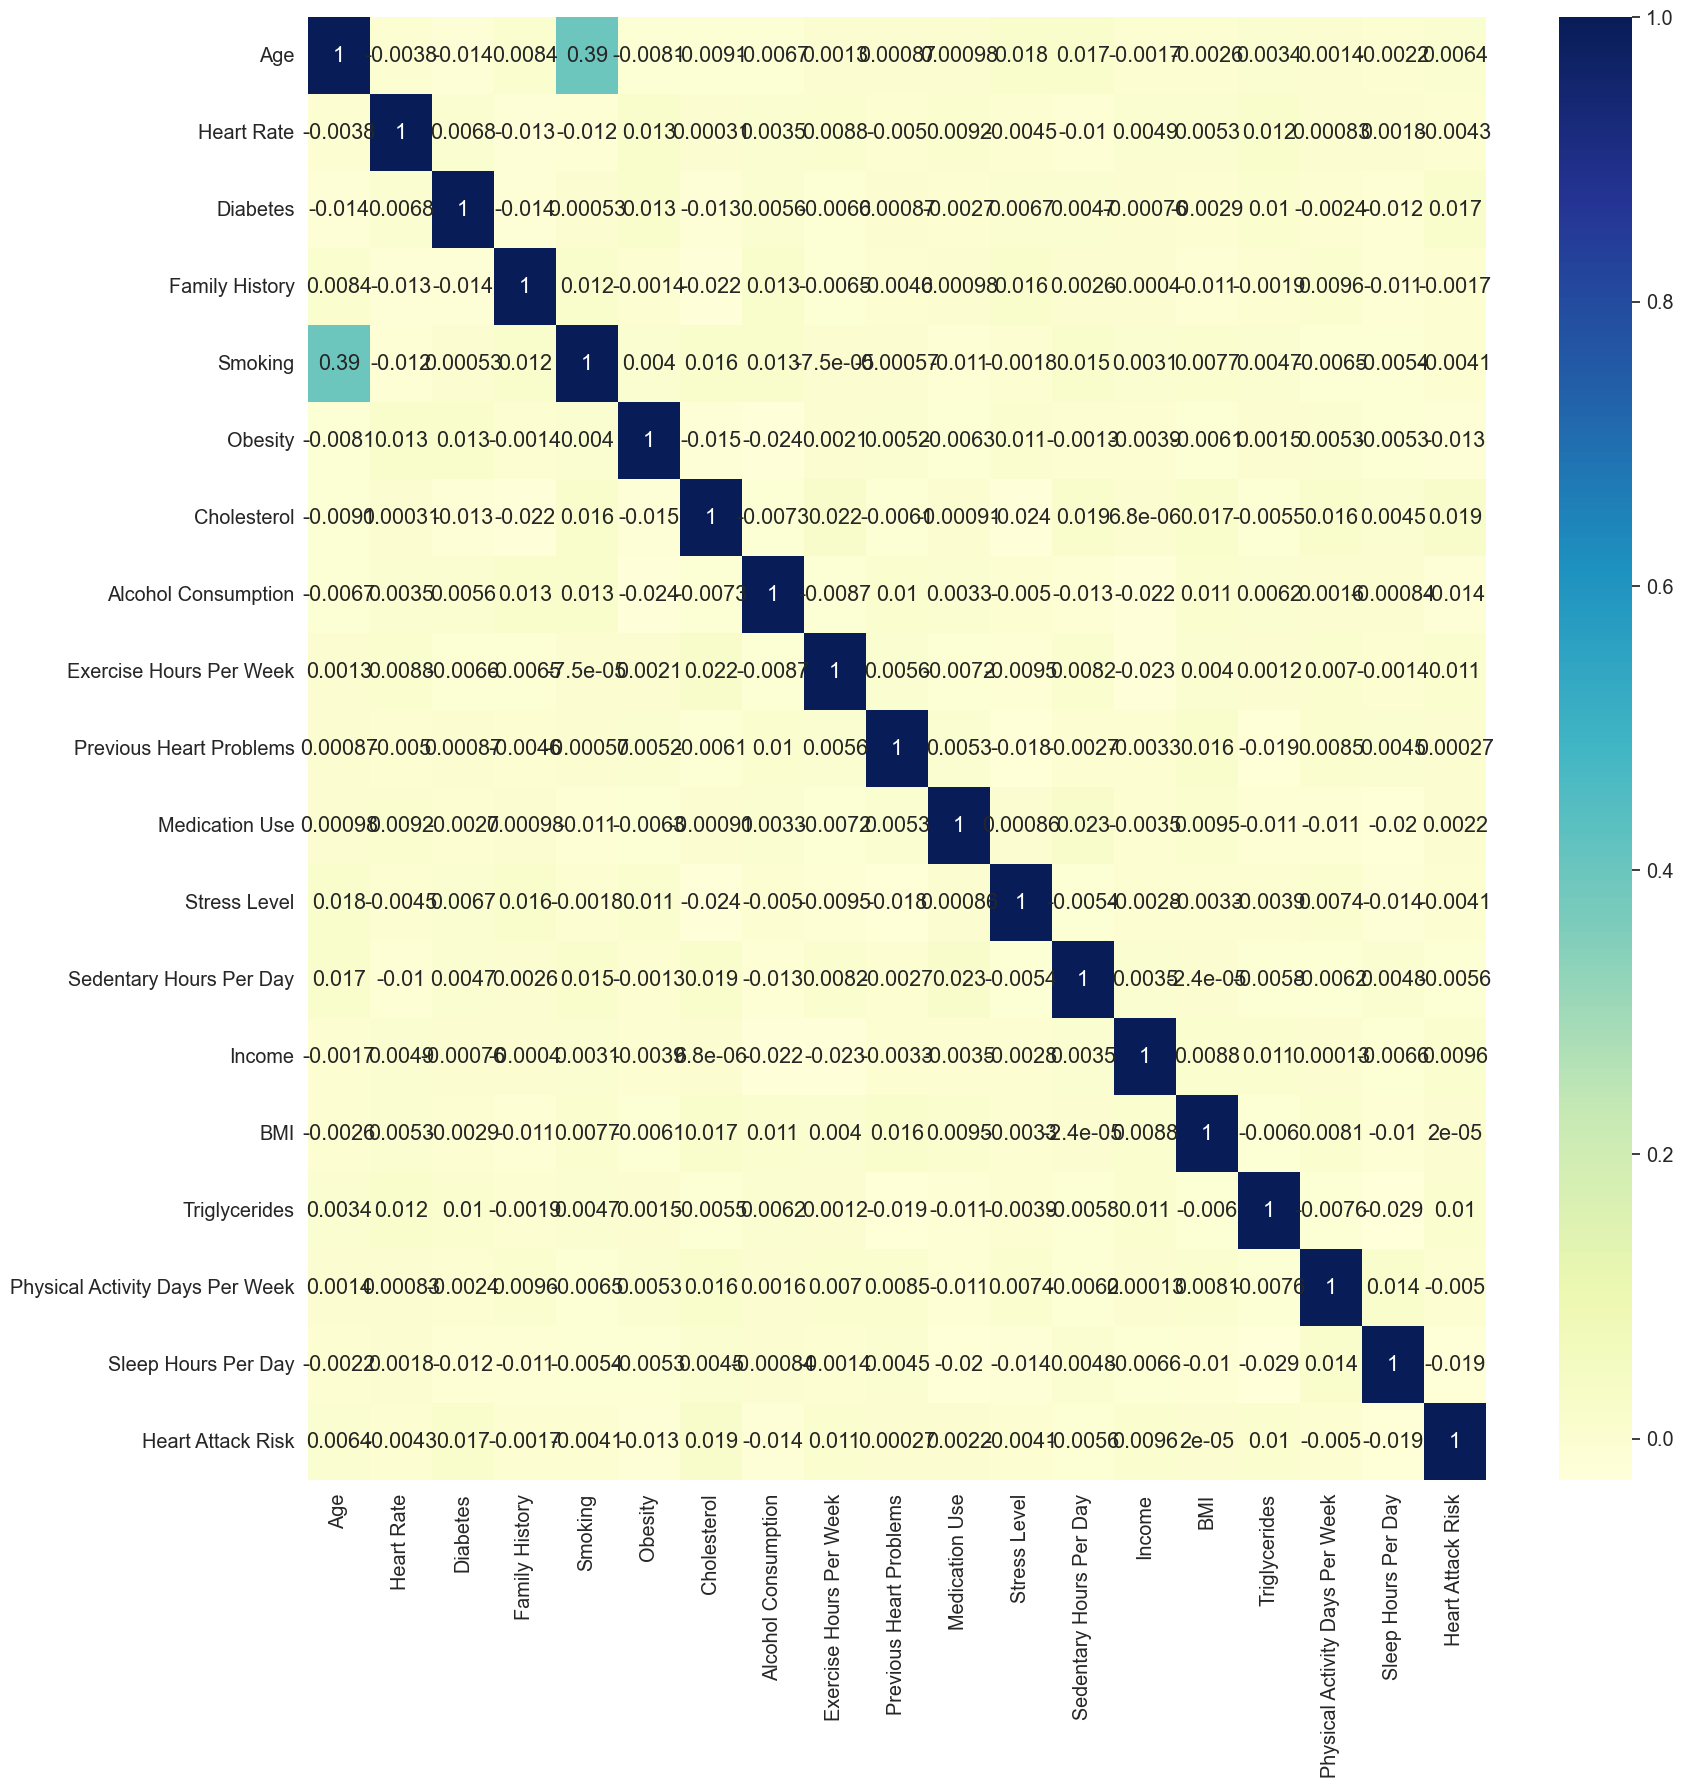

In [243]:
plt.figure(figsize = (19,19))
sns.heatmap(df[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 'Exercise Hours Per Week',
     'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

In [244]:
'''
from High Correlation Filter
from here its observed that:
Heart attack prediction not much dependent on the below:
1) smoking
2) diastolic
3) obesity
4) previous heart problems
5) diabetes
6)family history
7) Alcohol Consumption

8) Medication level

'''

'\nfrom High Correlation Filter\nfrom here its observed that:\nHeart attack prediction not much dependent on the below:\n1) smoking\n2) diastolic\n3) obesity\n4) previous heart problems\n5) diabetes\n6)family history\n7) Alcohol Consumption\n\n8) Medication level\n\n'

# Feature Selection Using Random forest

In [245]:
'''
Target here is 'Heart Attack Risk' which is numeric.
'''
x_rf=df.drop('Heart Attack Risk',axis=1)
y_rf = df['Heart Attack Risk']

In [246]:
x_train_rf,x_test_rf,y_train_rf,y_test_rf=train_test_split(x_rf,y_rf,random_state=0,test_size=0.2)


In [247]:
rf = RandomForestClassifier(random_state=0)

In [248]:
rf.fit(x_train_rf,y_train_rf)

RandomForestClassifier(random_state=0)

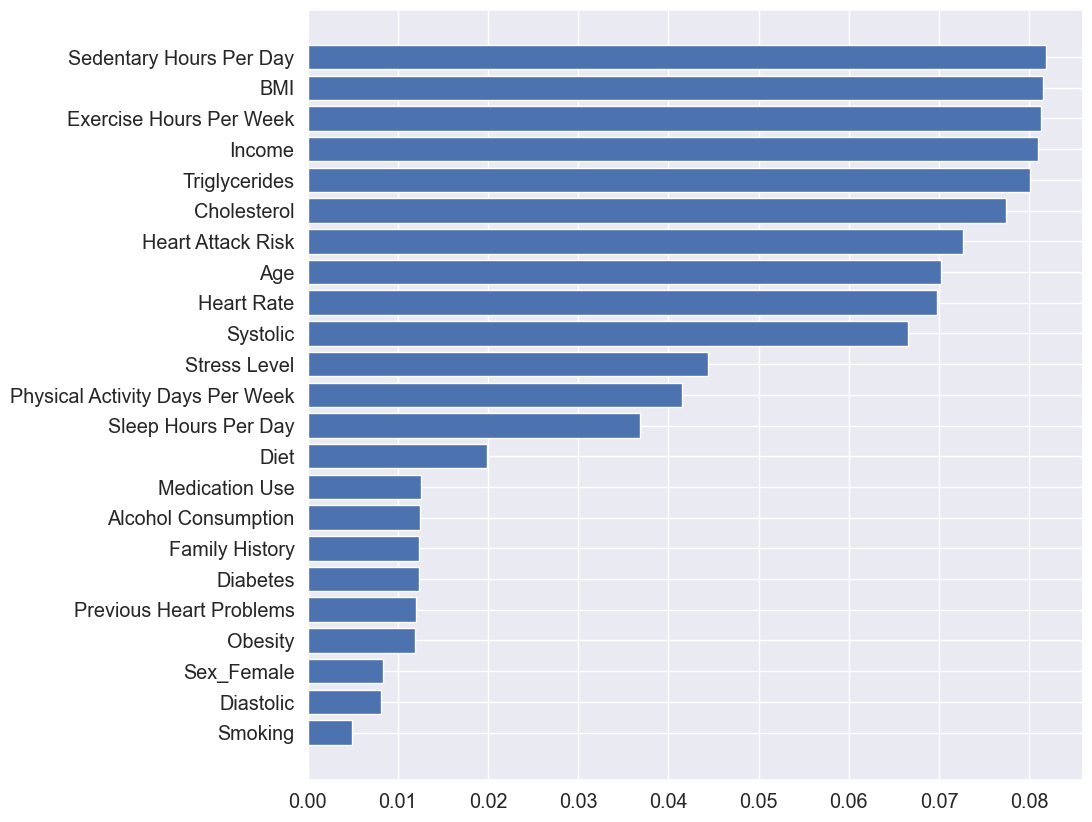

In [249]:
f_i = list(zip(df,rf.feature_importances_))
f_i.sort(key=lambda  x:x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [250]:
'''
from Feature Selection Using Random forest:

from here its observed that:

Heart attack prediction not much dependent on the below: => such as the features that raised in high corelation filter.

1) smoking
2) diastolic
3) obesity
4) previous heart problems
5) diabetes
6)family history
7) Alcohol Consumption

8) Medication level

9)Sex

so i will drop them

'''

'\nfrom Feature Selection Using Random forest:\n\nfrom here its observed that:\n\nHeart attack prediction not much dependent on the below: => such as the features that raised in high corelation filter.\n\n1) smoking\n2) diastolic\n3) obesity\n4) previous heart problems\n5) diabetes\n6)family history\n7) Alcohol Consumption\n\n8) Medication level\n\n9)Sex\n\nso i will drop them\n\n'

In [251]:
df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic', 'Diastolic', 'Sex_Female', 'Sex_Male'],
      dtype='object')

In [252]:
df.drop('Smoking',axis=1,inplace = True)
df.drop('Diastolic',axis=1,inplace = True)
df.drop('Obesity',axis=1,inplace = True)
df.drop('Previous Heart Problems',axis=1,inplace = True)
df.drop('Diabetes',axis=1,inplace = True)
df.drop('Family History',axis=1,inplace = True)
df.drop('Alcohol Consumption',axis=1,inplace = True)
df.drop('Medication Use',axis=1,inplace = True)
df.drop('Sex_Female',axis=1,inplace = True)
df.drop('Sex_Male',axis=1,inplace = True)

In [276]:
df.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic
0,67,208,72,4.168189,1,9,6.615001,261404,31.251233,286,0,6,0,158
1,21,389,98,1.813242,0,1,4.963459,285768,27.194973,235,1,7,0,165
2,21,324,72,2.078353,2,9,9.463426,235282,28.176571,587,4,4,0,174
3,84,383,73,9.828130,1,9,7.648981,125640,36.464704,378,3,4,0,163
4,66,318,93,10.070897,0,6,1.514821,160555,21.809144,231,1,5,0,91


In [277]:
df.to_csv("processed_heart_attack.csv",index=False)

In [253]:
df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Diet',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic'],
      dtype='object')